# **СЕМИНАРСКА РАБОТА ПО ПРЕДМЕТОТ ВОВЕД ВО НАУКАТА ЗА ПОДАТОЦИ**
Изработила: Вероника Нушкова 203065


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
!pip install tsfresh
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 12.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from dateutil import parser

 Читање на податоци

In [ ]:
data_country1 = pd.read_csv('/content/drive/MyDrive/wfp_food_prices_chn.csv',)
data_country2 = pd.read_csv('/content/drive/MyDrive/wfp_food_prices_afg.csv')
data_country3 = pd.read_csv('/content/drive/MyDrive/wfp_food_prices_dza.csv')

Конкатенирање на податоците

In [ ]:
data = pd.concat([data_country1, data_country2, data_country3], ignore_index=True)

In [ ]:
selected_columns = ['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude', 'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency', 'price', 'usdprice']
filtered_data = data[selected_columns]


In [ ]:
grouped_data = data.groupby('market')

In [ ]:
extracted_features_df = pd.DataFrame()


Циклус за да ги прикаже податоците за секој market

In [ ]:
for market, market_data in grouped_data:
    print(market_data)

        date      admin1      admin2            market  latitude longitude  \
0      #date  #adm1+name  #adm2+name  #loc+market+name  #geo+lat  #geo+lon   
1260   #date  #adm1+name  #adm2+name  #loc+market+name  #geo+lat  #geo+lon   
40928  #date  #adm1+name  #adm2+name  #loc+market+name  #geo+lat  #geo+lon   

         category   commodity        unit         priceflag         pricetype  \
0      #item+type  #item+name  #item+unit  #item+price+flag  #item+price+type   
1260   #item+type  #item+name  #item+unit  #item+price+flag  #item+price+type   
40928  #item+type  #item+name  #item+unit  #item+price+flag  #item+price+type   

        currency   price    usdprice  
0      #currency  #value  #value+usd  
1260   #currency  #value  #value+usd  
40928  #currency  #value  #value+usd  
             date admin1 admin2   market   latitude         longitude  \
40929  2015-04-15  Alger  Hydra  Algiers  36.752887  3.04204800000002   
40930  2015-04-15  Alger  Hydra  Algiers  36.752887  3.04204

In [ ]:
data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2014-01-15,Hebei Sheng,Shijiazhuang,Sijiazhuang,38.04,114.51,cereals and tubers,Wheat,KG,actual,Wholesale,CNY,2.66,0.4405
2,2014-01-15,Heilongjiang Sheng,Harbin,Heilongjiang,45.75,126.63,cereals and tubers,Maize,KG,actual,Wholesale,CNY,2.17,0.3598
3,2014-01-15,Henan Sheng,Zhengzhou,Zhengzhou,34.77,113.65,cereals and tubers,Wheat,KG,actual,Wholesale,CNY,2.55,0.4228
4,2014-01-15,Hubei Sheng,Jingmen,Hubei,30.97,112.23,cereals and tubers,Rice (Indica),KG,actual,Wholesale,CNY,3.92,0.65


In [ ]:
unique_dates = data['date'].unique()
print(unique_dates)

['#date' '2014-01-15' '2014-02-15' '2014-03-15' '2014-04-15' '2014-05-15'
 '2014-06-15' '2014-07-15' '2014-08-15' '2014-09-15' '2014-10-15'
 '2014-11-15' '2014-12-15' '2015-01-15' '2015-02-15' '2015-03-15'
 '2015-04-15' '2015-05-15' '2015-06-15' '2015-07-15' '2015-08-15'
 '2015-09-15' '2015-10-15' '2015-11-15' '2015-12-15' '2016-01-15'
 '2016-02-15' '2016-03-15' '2016-04-15' '2016-05-15' '2016-06-15'
 '2016-07-15' '2016-08-15' '2016-09-15' '2016-10-15' '2016-11-15'
 '2016-12-15' '2017-01-15' '2017-02-15' '2017-03-15' '2017-04-15'
 '2017-05-15' '2017-06-15' '2017-07-15' '2017-08-15' '2017-09-15'
 '2017-10-15' '2017-11-15' '2017-12-15' '2018-01-15' '2018-02-15'
 '2018-03-15' '2018-04-15' '2018-05-15' '2018-06-15' '2018-07-15'
 '2018-08-15' '2018-09-15' '2018-10-15' '2018-11-15' '2018-12-15'
 '2019-01-15' '2019-02-15' '2019-03-15' '2019-04-15' '2019-05-15'
 '2019-06-15' '2019-07-15' '2019-08-15' '2019-09-15' '2019-10-15'
 '2019-11-15' '2019-12-15' '2020-01-15' '2020-02-15' '2020-03-15'
 '

Отстранување на '#date' и конвертирање на 'date' колоната во datetime

In [ ]:
data = data[data['date'] != '#date']

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

<ipython-input-15-fe951d4bf08a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')


Филтрирање на податоците за последните 4 години

In [ ]:
latest_date = data['date'].max()
oldest_date = latest_date - pd.DateOffset(years=4)


In [ ]:
filtered_data = data.loc[data['date'] >= oldest_date]

In [ ]:
print(filtered_data)

            date              admin1        admin2        market    latitude  \
1109  2020-01-15         Hebei Sheng  Shijiazhuang   Sijiazhuang       38.04   
1110  2020-01-15  Heilongjiang Sheng        Harbin  Heilongjiang       45.75   
1111  2020-01-15         Henan Sheng     Zhengzhou     Zhengzhou       34.77   
1112  2020-01-15         Hubei Sheng       Jingmen         Hubei       30.97   
1113  2020-01-15         Hubei Sheng         Wuhan         Wuhan       30.58   
...          ...                 ...           ...           ...         ...   
43108 2021-11-15             Tindouf       Tindouf       Tindouf  27.6761012   
43109 2021-11-15             Tindouf       Tindouf       Tindouf  27.6761012   
43110 2021-11-15             Tindouf       Tindouf       Tindouf  27.6761012   
43111 2021-11-15             Tindouf       Tindouf       Tindouf  27.6761012   
43112 2021-11-15             Tindouf       Tindouf       Tindouf  27.6761012   

               longitude               

Извлекување на атрибути со користење на tsfresh

In [ ]:
grouped_data = filtered_data.groupby('admin1')
extracted_features_list = []

In [ ]:
filtered_data['admin1'] =data['admin1']


<ipython-input-24-c8e243c26588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['admin1'] =data['admin1']


Принтање на сите колони во датасетот за подобар приказ и увид на имињата на колоните

In [ ]:
print(filtered_data.columns)


Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')


Отстранување на ред од податочната табела admin1_data ако вредноста во колоната 'admin1' е NaN поточно празна.

In [ ]:
admin1_data.dropna(subset=['admin1'], inplace=True)


NameError: ignored

In [ ]:
nan_rows = admin1_data[admin1_data['admin1'].isnull()]
print(nan_rows)


NameError: ignored

In [ ]:
print(admin1_data.head())


NameError: ignored

In [ ]:
admin1_data.dropna(inplace=True)


In [ ]:
selected_columns = ['date', 'admin1', 'commodity', 'currency', 'price', 'usdprice']
filtered_data = data[selected_columns]

In [ ]:
grouped_data = filtered_data.groupby(['admin1', 'commodity'])

Креирање на празен граф со користење на библиотеката NetworkX за работа со графови.

In [ ]:
G = nx.Graph()

In [ ]:
print(filtered_data['price'])


1        2.66
2        2.17
3        2.55
4        3.92
5         4.4
         ... 
43108     0.0
43109     0.0
43110     0.0
43111     0.0
43112     0.0
Name: price, Length: 43110, dtype: object


Конвертирање на секоја од вредностите во формат на број во колоната 'price'.

In [ ]:
for value in filtered_data['price']:
    try:
        float(value)
    except ValueError:
        print("Invalid value:", value)


In [ ]:
filtered_data['price'] = filtered_data['price'].apply(lambda x: float(x))


<ipython-input-33-e3fbdc735a2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['price'] = filtered_data['price'].apply(lambda x: float(x))


Креирање граф на поврзаност (мрежа) помеѓу различни земји и производи на основа на просечните цени на производите.

In [ ]:
for (admin1, commodity), group in grouped_data:
    average_price = group['price'].mean()
    G.add_edge(admin1, commodity, weight=average_price)


Поврзаност на цените на производите во различните земји и нивна визуелизација

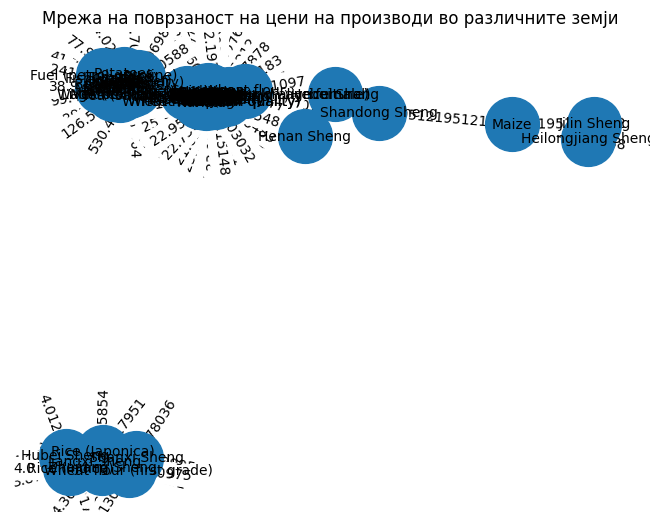

In [ ]:
pos = nx.spring_layout(G, seed=42)  # Поставување на позиции на јазлите
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Мрежа на поврзаност на цени на производи во различните земји")
plt.show()

Печатење на имињата на колоните

In [ ]:
print(data.columns)

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')


Споредба на временски редови на цени во анализираните 3 земји: Кина, Алгериа, Афганистан.

In [ ]:
import matplotlib.pyplot as plt

Претворање на 'date' во временски објект

In [ ]:
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

<ipython-input-38-df3e815603f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])


Неколку визуелизации за споредба на цените на храната на производи во долунаведените земји

In [ ]:
selected_countries = ['China', 'Afghanistan', 'Algeria']
selected_data = filtered_data[filtered_data['admin1'].isin(selected_countries)]

In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

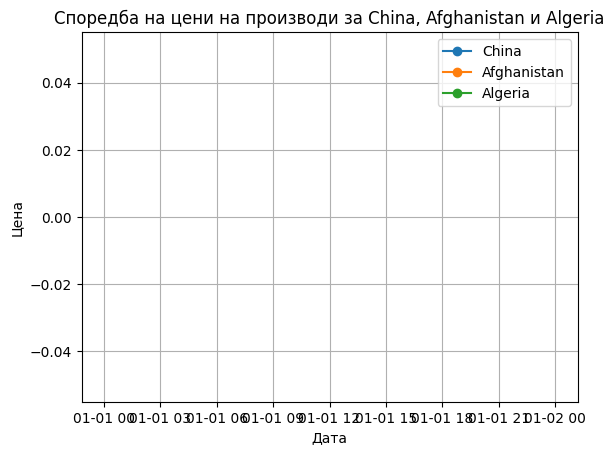

In [ ]:
for country in selected_countries:
    country_data = selected_data[selected_data['admin1'] == country]
    plt.plot(country_data['date'], country_data['price'], marker='o', label=country)

plt.title("Споредба на цени на производи за China, Afghanistan и Algeria")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.grid(True)
plt.legend()
plt.show()

Хистограм за споредба на цените на храната на прозиводите за дадените земји

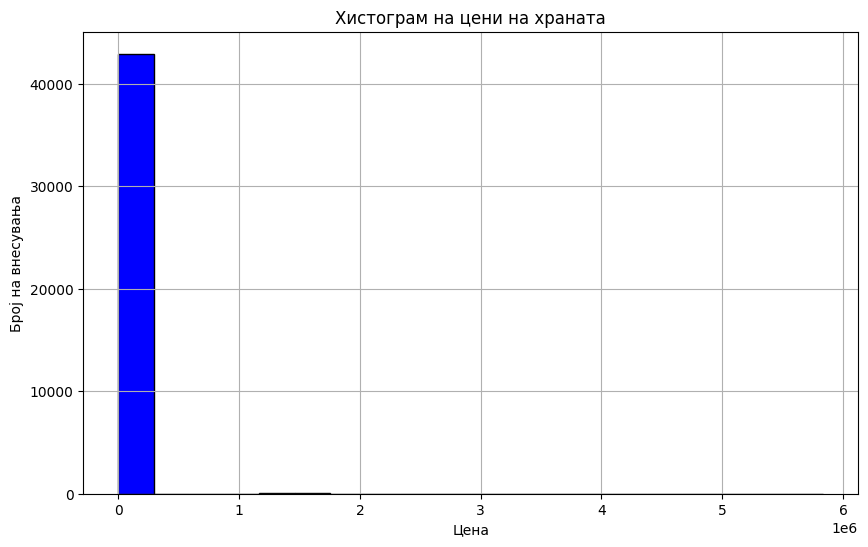

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['price'], bins=20, color='blue', edgecolor='black')
plt.title("Хистограм на цени на храната")
plt.xlabel("Цена")
plt.ylabel("Број на внесувања")
plt.grid(True)
plt.show()

Heatmap за споредба на цените на храната на производите во трите дадени земји


In [ ]:
pivot_table = filtered_data.pivot_table(values='price', index='admin1', columns='commodity', aggfunc=np.mean)
import seaborn as sns

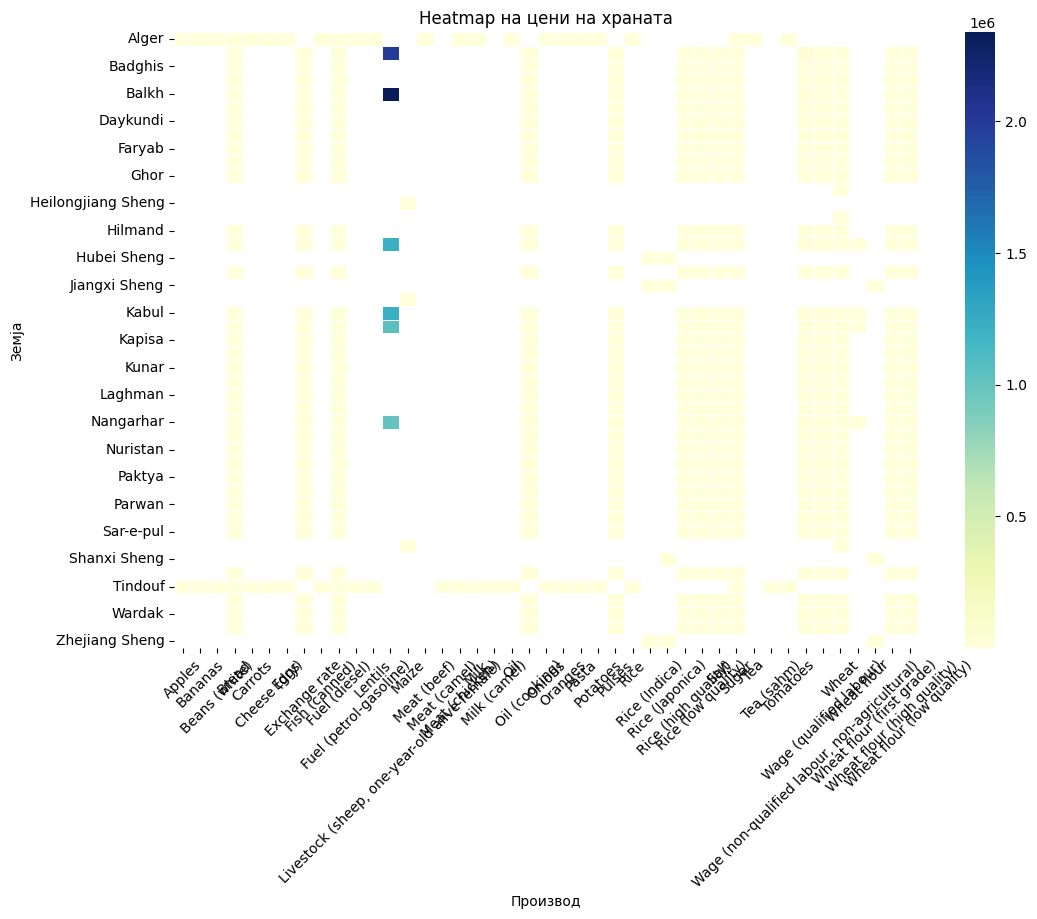

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title("Heatmap на цени на храната")
plt.xlabel("Производ")
plt.ylabel("Земја")
plt.xticks(rotation=45)
plt.show()